<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-download" data-toc-modified-id="Data-download-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data download</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#get-decorrelation-parameters" data-toc-modified-id="get-decorrelation-parameters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>get decorrelation parameters</a></span></li><li><span><a href="#setup-fit" data-toc-modified-id="setup-fit-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>setup fit</a></span></li><li><span><a href="#Save-and-load-config-file" data-toc-modified-id="Save-and-load-config-file-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Save and load config file</a></span></li><li><span><a href="#Run--fit" data-toc-modified-id="Run--fit-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Run  fit</a></span></li><li><span><a href="#load-result" data-toc-modified-id="load-result-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>load result</a></span></li><li><span><a href="#result-comparison" data-toc-modified-id="result-comparison-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>result comparison</a></span></li></ul></li></ul></div>

# KELT-20: CHEOPS occultations

In [1]:
import CONAN3
CONAN3.__version__

'3.2.0'

## Data download

In [17]:
from CONAN3.get_files import get_CHEOPS_data
df = get_CHEOPS_data("KELT-20")
df.search( filters = { "pi_name"         : {"contains":["LENDL"]}, 
                       "data_arch_rev"   : {"equal":[3]},
                       "status_published": {"equal":[True]}
                     })

  obj_id_catname                    file_key       pi_name  date_mjd_start  \
0        KELT-20  CH_PR100016_TG014101_V0300  Monika LENDL    59390.531256   
1        KELT-20  CH_PR100016_TG014102_V0300  Monika LENDL    59407.951403   
2        KELT-20  CH_PR100016_TG014103_V0300  Monika LENDL    59425.294447   
3        KELT-20  CH_PR100016_TG014104_V0300  Monika LENDL    59439.168753   
4        KELT-20  CH_PR100016_TG014105_V0300  Monika LENDL    59762.250712   
5        KELT-20  CH_PR100016_TG014106_V0300  Monika LENDL    59776.167371   
6        KELT-20  CH_PR100016_TG014107_V0300  Monika LENDL    59800.485426   

  obs_total_exptime  data_arch_rev  status_published  
0              36.0              3              True  
1              36.0              3              True  
2              36.0              3              True  
3              36.0              3              True  
4              36.0              3              True  
5              36.0              3           

download the first 4 occultation light curves

downloaded lightcurve with file key: CH_PR100016_TG014101_V0300, aperture: DEFAULT
downloaded lightcurve with file key: CH_PR100016_TG014102_V0300, aperture: DEFAULT
downloaded lightcurve with file key: CH_PR100016_TG014103_V0300, aperture: DEFAULT
downloaded lightcurve with file key: CH_PR100016_TG014104_V0300, aperture: DEFAULT


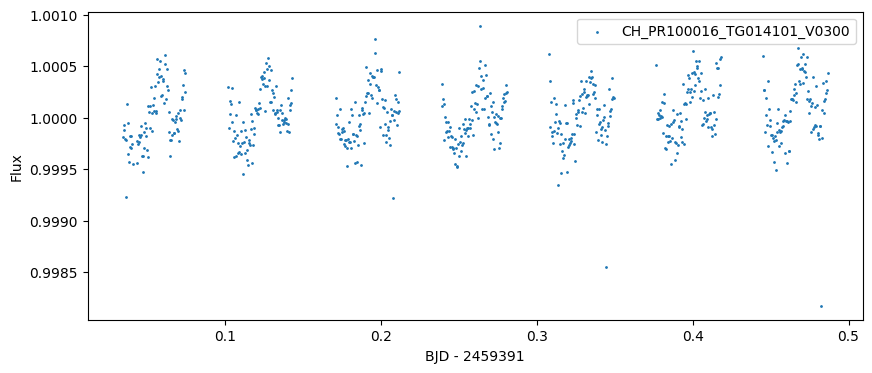

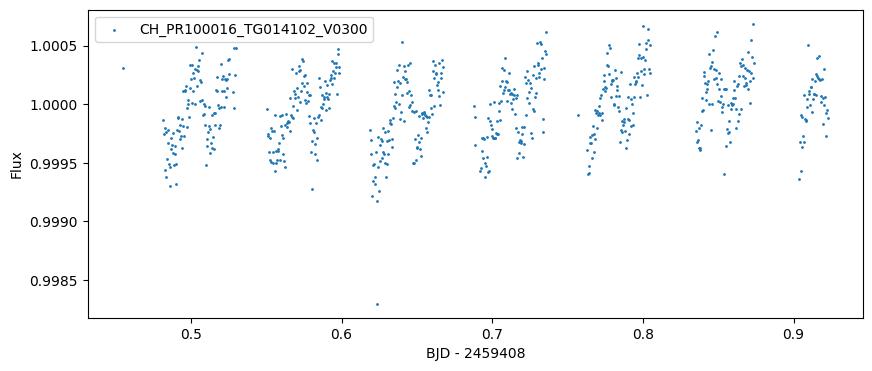

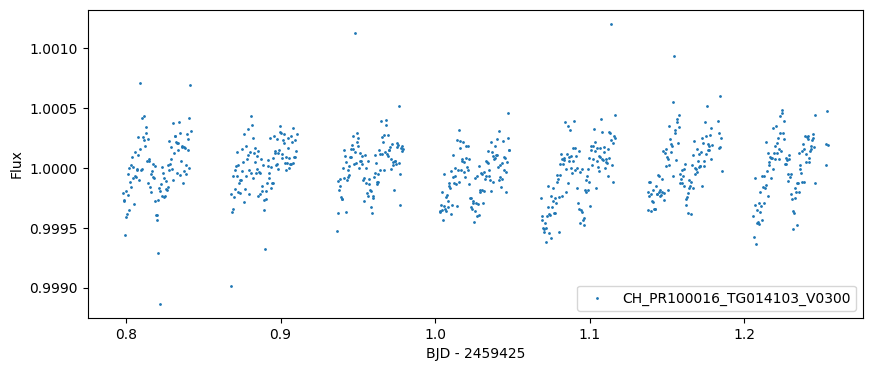

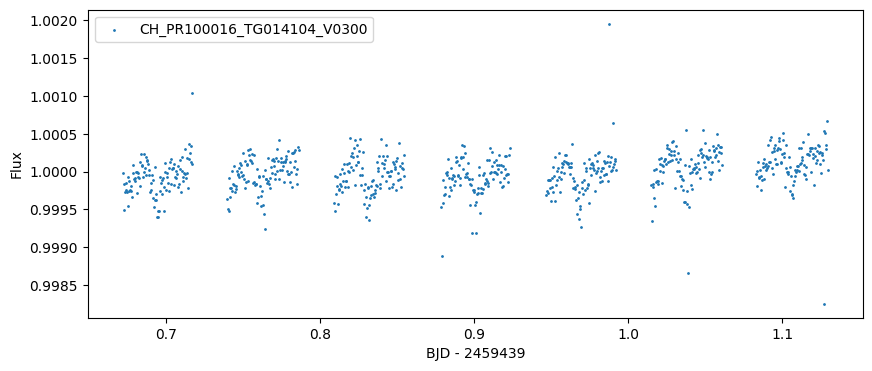

saved file as data/KELT-20_014101.dat
saved file as data/KELT-20_014102.dat
saved file as data/KELT-20_014103.dat
saved file as data/KELT-20_014104.dat


In [2]:
df.download(file_keys=df.file_keys[:4], aperture="DEFAULT")
df.scatter()
df.save_CONAN_lcfile(bjd_ref = 2457000, folder="data")

## Data Analysis

In [2]:
import numpy as np
import CONAN3
import matplotlib.pyplot as plt
CONAN3.__version__

'3.2.0'

In [3]:
from glob import glob
import os

from os.path import basename
import pandas as pd

In [4]:
path = "data/"
lcs = sorted(glob(f"{path}KELT-20*"))#, key=os.path.getmtime)
lc_list = [basename(lc) for lc in lcs][:2]

In [5]:
P     = 3.474074 
BJD_0 = 2459406.927174 - 2457000

In order to derive different occultation depths for the observations, we will set different filters


KELT-20_014101.dat: Rejected 6 pts > 4.0MAD from the median

KELT-20_014102.dat: Rejected 9 pts > 4.0MAD from the median
Rescaled data columns of KELT-20_014101.dat with method:med_sub
Rescaled data columns of KELT-20_014102.dat with method:med_sub


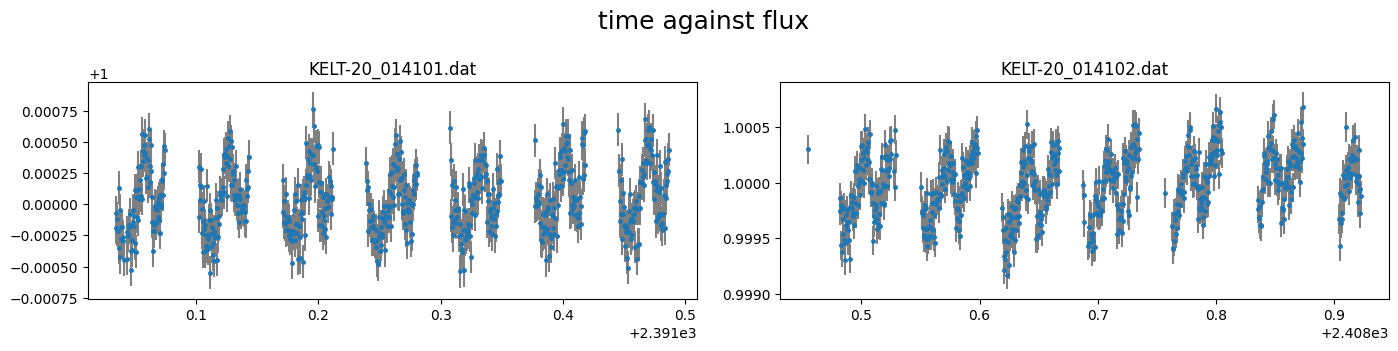

# ============ Input lightcurves, filters baseline function =======================================================
name               filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7 col8|sin id GP spline_config  
KELT-20_014101.dat CH1  0.6  |None    W11C4   med_sub |   0    0    0    0    0    0    0|  0  1 n  None           
KELT-20_014102.dat CH2  0.6  |None    W11C4   med_sub |   0    0    0    0    0    0    0|  0  2 n  None           


lightcurves from filepath: data/
1 transiting planet(s)
Order of unique filters: ['CH1', 'CH2']

In [6]:
lc_obj = CONAN3.load_lightcurves(lc_list, path, 
                                 filters = [f"CH{i+1}" for i in range(len(lc_list))],
                                 lamdas  = 0.6)
lc_obj.clip_outliers(width=11, clip=4)
lc_obj.rescale_data_columns()
lc_obj.plot()
lc_obj

Notice the strong systematics in the `CHEOPS` lightcurves. they are mostly due to to correlation with the spacecraft roll angle (which is stored in column 5 of the data). we can visualize this correlation by plotting column 5 against the flux

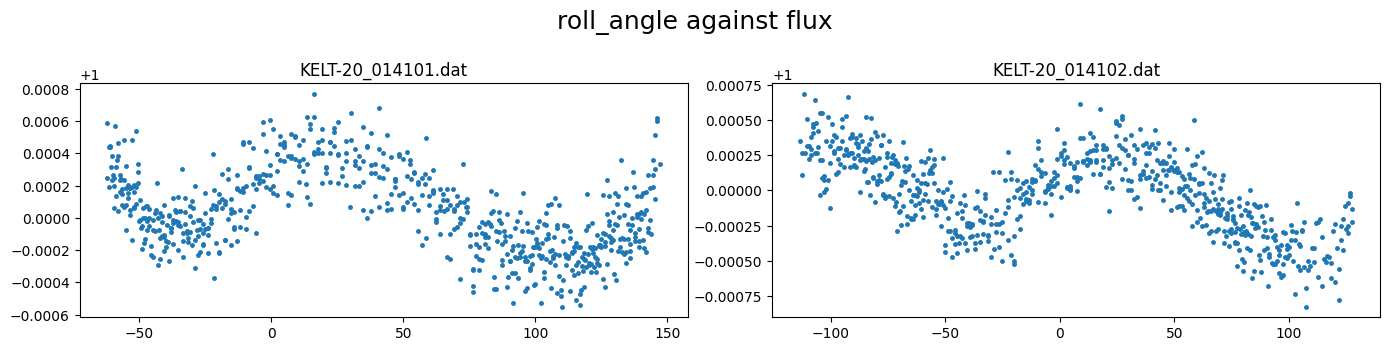

In [7]:
lc_obj.plot(plot_cols=(5,1), col_labels=("roll_angle","flux"))

A combination of sines and cosines of the roll-angle (and the harmonics) have been used in several CHEOPS papers to model this correlation. Here, we will use CONAN to fit a spline model as a function of the roll-angle and eventually replace the spline with a GP

In [8]:
lc_obj.add_spline(lc_list="all", par="col5", degree=3, knot_spacing=45 )

KELT-20_014101.dat – degree 3 spline to fit col5: knot spacing=45 --> [c5:d3k45]
KELT-20_014102.dat – degree 3 spline to fit col5: knot spacing=45 --> [c5:d3k45]


# ============ Input lightcurves, filters baseline function =======================================================
name               filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7 col8|sin id GP spline_config  
KELT-20_014101.dat CH1  0.6  |None    W11C4   med_sub |   0    0    0    0    0    0    0|  0  1 n  c5:d3k45       
KELT-20_014102.dat CH2  0.6  |None    W11C4   med_sub |   0    0    0    0    0    0    0|  0  2 n  c5:d3k45       


for 2 dimensional spline, the line below can be uncommented. knot spacing of 'r' implies that the full range of the array is fit by a single spline of the specified order

In [9]:
# lc_obj.add_spline(lc_list="all", par=("col5","col8"), degree=(3,2), knot_spacing=(45,'r') )

### get decorrelation parameters

here we are paramterizing the transit/occultation model with `Duration` instead of `rho_star`

In [10]:
tra_occ_pars =dict(T_0          = BJD_0,      
                    Period      = P,          
                    Impact_para = 0.515,      
                    RpRs        = 0.11572, 
                    Duration    = 0.13998861,
#                     rho_star    = 0.76,       
                    D_occ       = (-100, 0, 300) 
                  )

we can exclude columns 5 from the decorrelations since we have setup a spline for them, 

we can also setup the `planet_parameters` using the same input from tra_occ_pars

if the errorbars seem underestimated, we can set `use_jitter_est=True` to use inflate the errorbars by the jitter value estimated by comparing the rms of the data to the flux uncertainties



getting decorrelation parameters for lc: KELT-20_014101.dat (spline=True, s_samp=False, jitt=63.14ppm)
BEST BIC:685.98, pars:['A8', 'B7']

getting decorrelation parameters for lc: KELT-20_014102.dat (spline=True, s_samp=False, jitt=63.71ppm)
BEST BIC:692.80, pars:['B7']


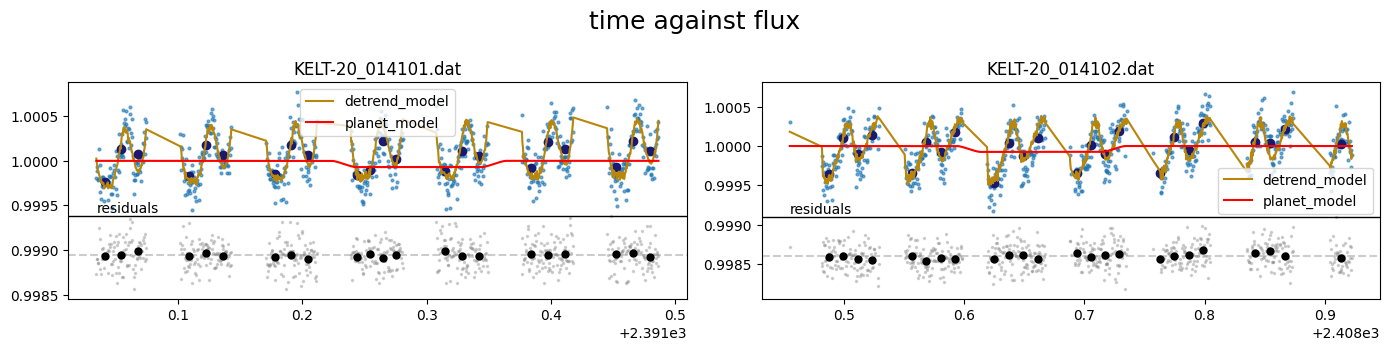


Setting-up spline for decorrelation. Use `.add_spline(None)` method to remove/modify

Setting-up baseline model from result
# ============ Input lightcurves, filters baseline function =======================================================
name               filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7 col8|sin id GP spline_config  
KELT-20_014101.dat CH1  0.6  |None    W11C4   med_sub |   0    0    0    0    0    2    1|  0  1 n  c5:d3k45.0     
KELT-20_014102.dat CH2  0.6  |None    W11C4   med_sub |   0    0    0    0    0    2    0|  0  2 n  c5:d3k45.0     

Note: GP flag for the lcs has been set to ['n', 'n']. Use `._useGPphot` attribute to modify this list with 'y','ce' or 'n' for each loaded lc


Setting-up transit pars from input values
# ============ Planet parameters (Transit and RV) setup ========================================================== 
name                	fit 	prior                              	note
rho_star/[Duration] 	n   	F(0.13998861)  

In [11]:

decorr_res = lc_obj.get_decorr( **tra_occ_pars, delta_BIC=-5, 
                               exclude_cols=[5],
                               setup_planet=True,
                              use_jitter_est=True)

For each visit, plot the occultation depth measured from the least-squares fit

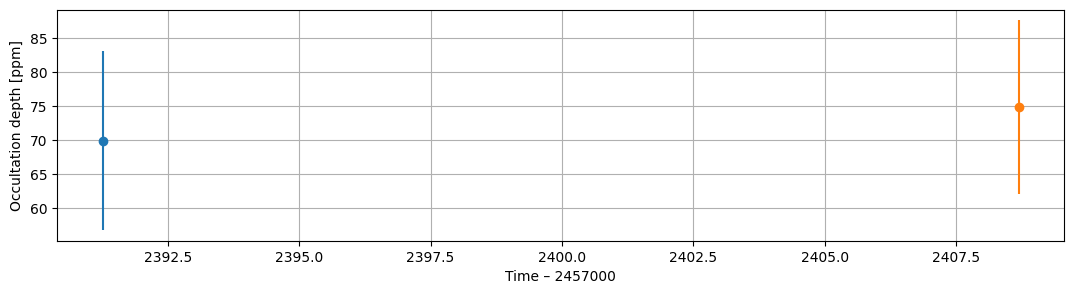

In [12]:
plt.figure(figsize=(13,3))
for res in decorr_res:
    plt.errorbar(np.median(res.time), res.params["D_occ"].value, res.params["D_occ"].stderr, fmt="o")  

plt.ylabel("Occultation depth [ppm]")
plt.xlabel("Time – 2457000")
plt.grid()

Let's see how well the spline models the roll-angle correlations

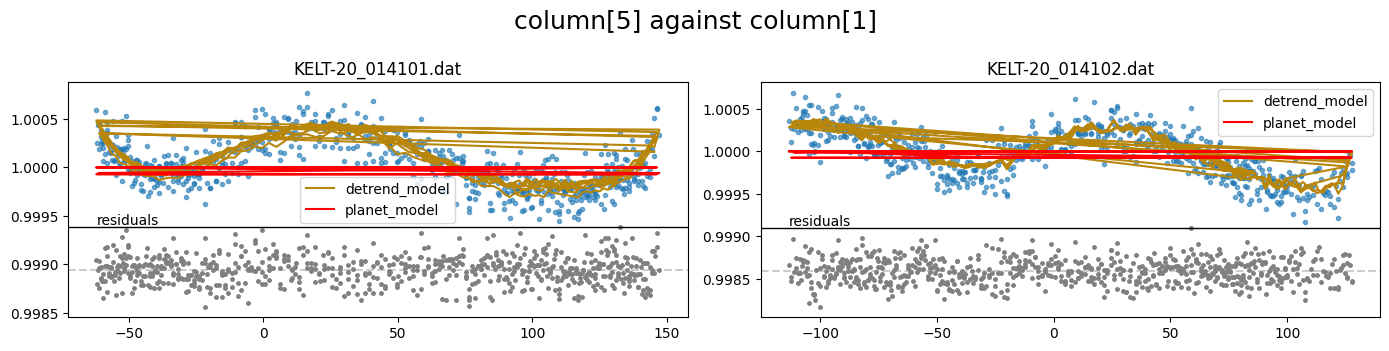

In [13]:
lc_obj.plot(plot_cols=(5,1),show_decorr_model=True)

###### Replace spline with GP to model roll-angle

In [14]:
lc_obj.add_spline()   #remove spline

No spline



In [15]:
lc_obj._rms_estimate

[0.00014618312529333667, 0.00014642200505444688]

In [16]:
lc_obj._useGPphot=["ce","ce"]    #celerite GP for both visits

In [17]:
lc_obj.add_GP("same",                       #same GP to be used to model all visits
              par         = "col5",         #roll angle column
              kernel      = "mat32",       
              amplitude   = (10,146,1500), # ppm
              lengthscale = (10,60,100)    # in degrees
             )

# ============ Photometry GP properties ===========================================================================
name               par1 kern1 Amplitude1_ppm     length_scale      |op| par2 kern2 Amplitude2_ppm     length_scale2    
same               col5 mat32 LU(10,146,1500)    LU(10,60,100)     |--| None None  None               None              


### setup fit

In [18]:
fit_obj = CONAN3.fit_setup(R_st=(1.617,0.05))

fit_obj.sampling(sampler="dynesty",n_cpus=10, n_burn=3000, n_steps=2000, n_chains=64)

# ============ Stellar input properties ======================================================================
# parameter     value 
Radius_[Rsun]  N(1.617,0.050)
Mass_[Msun]    N(1.000,0.010)
Input_method:[R+rho(Rrho), M+rho(Mrho)]: Rrho
# ============ FIT setup =====================================================================================
Number_steps                              2000 
Number_chains                             64 
Number_of_processes                       10 
Burnin_length                             3000 
n_live                                    300 
force_nlive                               False 
d_logz                                    0.1 
Sampler(emcee/dynesty)                    dynesty 
emcee_move(stretch/demc/snooker)          stretch 
nested_sampling(static/dynamic[pfrac])    static 
leastsq_for_basepar(y/n)                  n 
apply_LCjitter(y/n)                       y 
apply_RVjitter(y/n)                       y 
LCjitter_loglims(auto/[lo,hi]) 

### Save and load config file

In [23]:
CONAN3.create_configfile(lc_obj,None,fit_obj,filename="KELT20_occ_gpfit_dur.dat")

configuration file saved as KELT20_occ_gpfit_dur.dat


In [24]:
import CONAN3
lc_obj,rv_obj,fit_obj = CONAN3.load_configfile("KELT20_occ_gpfit_dur.dat")

In [25]:
lc_obj.print()

# ============ Input lightcurves, filters baseline function =======================================================
name               filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7 col8|sin id GP spline_config  
KELT-20_014101.dat CH1  0.6  |None    W11C4   med_sub |   0    0    0    0    0    2    1|  0  1 ce None           
KELT-20_014102.dat CH2  0.6  |None    W11C4   med_sub |   0    0    0    0    0    2    0|  0  2 ce None           
# ============ Photometry GP properties ===========================================================================
name               par1 kern1 Amplitude1_ppm     length_scale      |op| par2 kern2 Amplitude2_ppm     length_scale2    
same               col5 mat32 LU(10,146,1500)    LU(10,60,100)     |--| None None  None               None              
# ============ Planet parameters (Transit and RV) setup ========================================================== 
name                	fit 	prior                              	n

### Run  fit

In [19]:
result = CONAN3.run_fit(lc_obj, None, fit_obj, 
                        out_folder="result_KELT20_gp_dur2", rerun_result=True)

Fit result already exists in this folder: result_KELT20_gp_dur2.
Rerunning with saved posterior chains to generate plots and files...

CONAN fit launched!!!

Setting up photometry arrays ...
Setting up photometry GPs ...
Setting up RV arrays ...
Plotting prior distributions

Plotting initial guess
---------------------------

============ Samping started ... (using dynesty [static])======================
No of cpus: 10
No of dimensions: 13
fitting parameters:  ['CH1_DFocc' 'CH2_DFocc' 'lc1_logjitter' 'lc2_logjitter' 'lc1_off'
 'lc1_A7' 'lc1_B7' 'lc1_A8' 'lc2_off' 'lc2_A7' 'lc2_B7'
 'GPlcSame_Amp1_col5' 'GPlcSame_len1_col5']

Skipping dynesty run. Loading chains from disk

Dynesty chain written to disk as result_KELT20_gp_dur2/chains_dict.pkl. Run `result=CONAN3.load_result()` to load it.

============ Sampling Finished ==============================================

saved 1 corner plot(s) as result_KELT20_gp_dur2/corner_*.png

Plotting output figures
LC1 ...Writing LC output with GP(Ce

### load result

In [20]:
import CONAN3
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

result = CONAN3.load_result("result_KELT20_gp_dur2")

['lc'] Output files, ['KELT-20_014101_lcout.dat', 'KELT-20_014102_lcout.dat'], loaded into result object
['rv'] Output files, [], loaded into result object


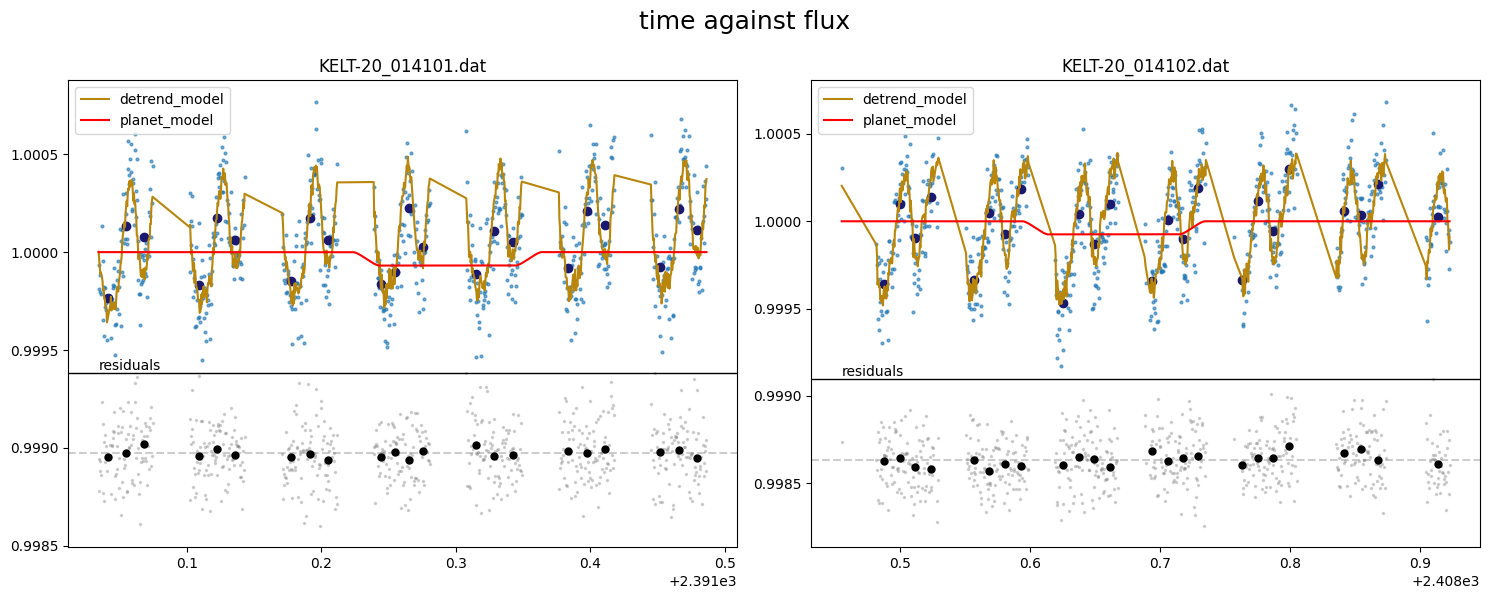

In [21]:
result.lc.plot_bestfit((0,1), figsize=(15,6));


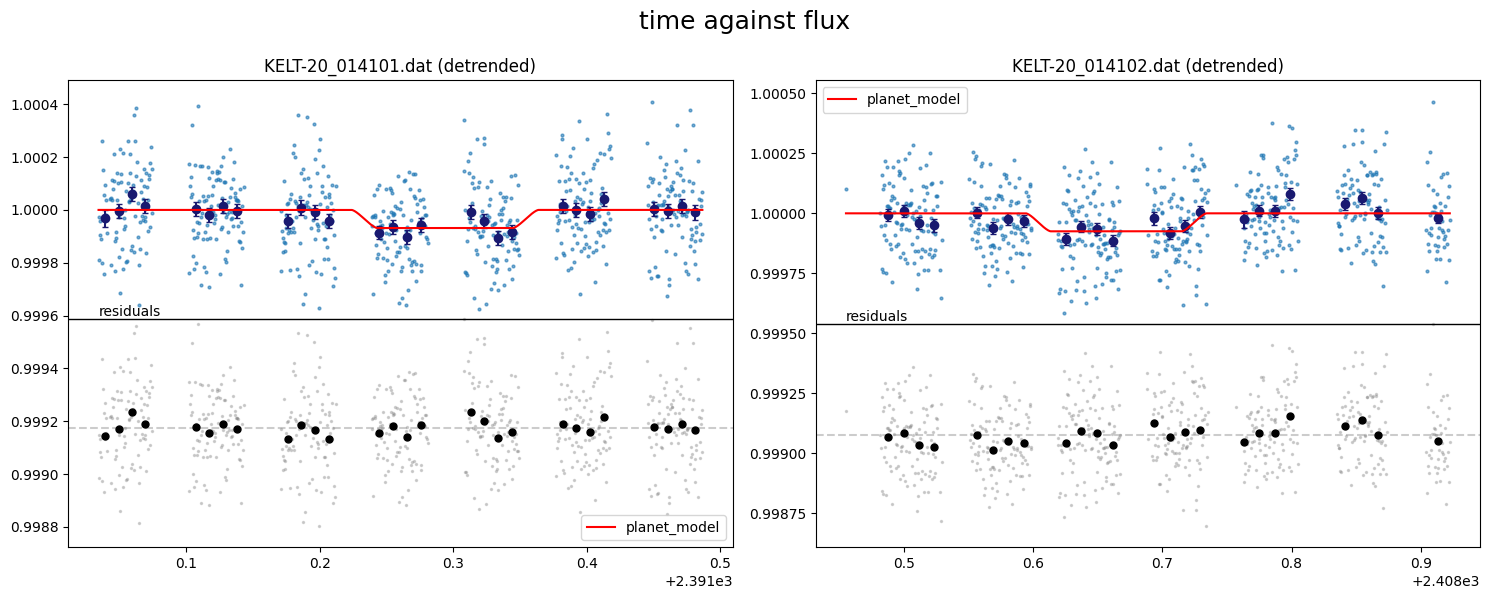

In [22]:
result.lc.plot_bestfit(detrend=True, figsize=(15,6), binsize=0.01);

In [23]:
result.lc.names

['KELT-20_014101.dat', 'KELT-20_014102.dat']

In [24]:
#evalute occultation model for first lc
lcmod = result.lc.evaluate(result.lc.names[0], return_std=True)

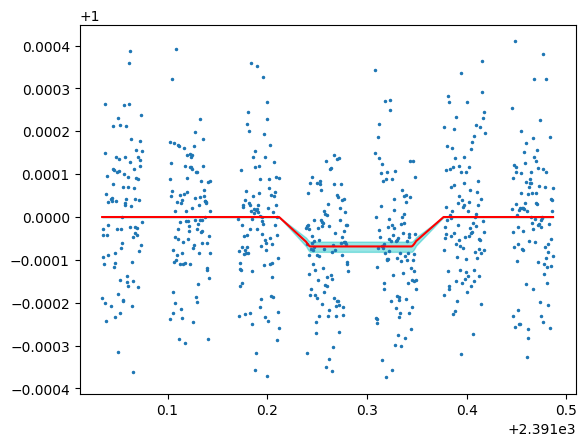

In [26]:
out = result.lc.outdata[result.lc.names[0]]

plt.plot(out.time, out.det_flux,".",ms=3)
plt.plot(out.time, lcmod.planet_model,"r")
plt.fill_between(out.time, lcmod.sigma_low, lcmod.sigma_high,color="c", alpha=0.4);


show chains and posteriors of the occulation depths

In [27]:
fig = result.plot_chains(pars=['CH1_DFocc', 'CH2_DFocc']);

chains are not available for dynesty sampler. instead see dynesty_trace_*.png plot in the output folder.


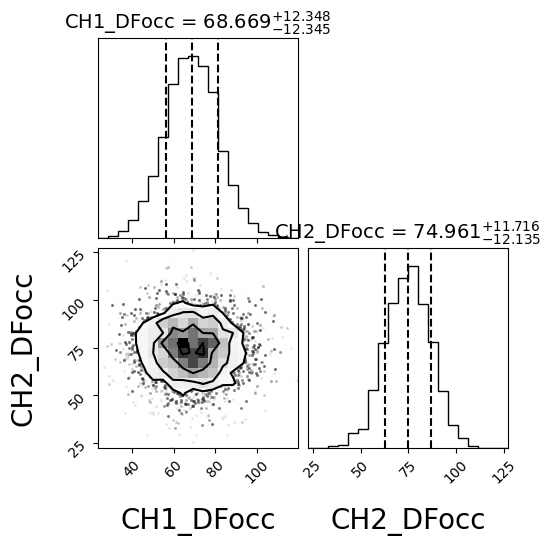

In [28]:
fig = result.plot_corner(pars = ['CH1_DFocc', 'CH2_DFocc']);

### result comparison

get median and standard deviation of the depths

In [36]:
depths = [np.median(result._chains[f"CH{i}_DFocc"]) for i in range(1,3)]
unc    = [np.mean(np.diff(np.quantile(result._chains[f"CH{i}_DFocc"],q=[0.16,0.5,0.84]))) for i in range(1,3)]

get median time of each occultation

In [37]:
mid_times = np.array([np.median(result.lc.outdata[nm]["time"]) for nm in result.lc.names])

- occultation depths derived in [Singh,V +2023](https://arxiv.org/abs/2311.03264)

In [38]:
paper_depth = [46,77]
paper_unc   = [14,14]

- occultation depths derived from `pycheops` analysis

In [39]:
pyc_depth  = [64,   70]
pyc_unc    = [12.5, 13]

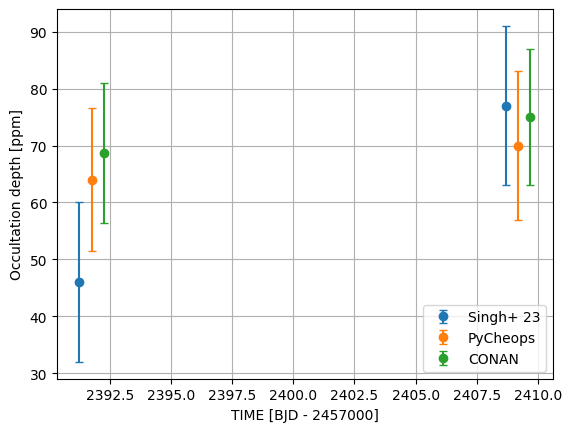

In [40]:
plt.errorbar(mid_times, paper_depth, paper_unc, fmt="o", capsize=3,label="Singh+ 23")
plt.errorbar(mid_times+0.5, pyc_depth, pyc_unc,  fmt="o", capsize=3, label="PyCheops")
plt.errorbar(mid_times+1, depths, unc, fmt="o", capsize=3, label="CONAN")

plt.grid()
plt.xlabel("TIME [BJD - 2457000]")
plt.ylabel("Occultation depth [ppm]")
plt.legend(loc="lower right");

The results agree with published values within one-sigma